In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [48]:
# Sample 1 million data points from a normal distribution
np.random.seed(0)
x1 = np.random.normal(3,2,size=1000000)
x2 = np.random.normal(-1,2,size=1000000)
print(x1)
theta=np.array([3,1,2])
X=np.column_stack((np.ones(1000000),x1,x2))
# epsilon=np.random.normal(0,2**0.5,size=1000000)
Y=np.dot(X,theta)+epsilon


[6.52810469 3.80031442 4.95747597 ... 1.40543472 4.74951219 5.74366132]


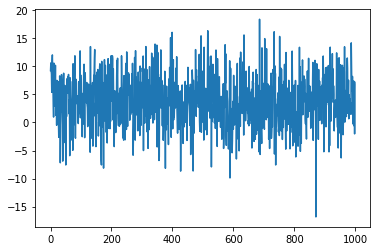

In [49]:
# dataset=pd.read_csv("data/q2/q2test.csv")
# print(dataset)
plt.plot(Y[:1000])

In [54]:
# Implement stochastic gradient descent
def sgd(theta,X,Y,alpha,num_iter,r):
    m=len(Y)
    np.random.shuffle(X)
    batches=m//r
    # converged=False
    # ans=0
    # while not converged:
    #     ans+=1
    #     H = np.dot(X,theta)
    #     loss=np.dot((H-Y).T,(H-Y))
    #     grad=np.dot(X.T,(H-Y))/(2*m)
    #     theta=theta-alpha*grad
    #     cost=loss/(2*m)
    #     if abs(cost_last-cost)<epsilon:
    #         converged=True
    #     cost_last=cost
    for i in range(num_iter):
        for b in range(batches):
            if(b!=batches-1):
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:b*r].T,(np.dot(X[(b-1)*r:b*r],theta)-Y[(b-1)*r:b*r]))
            else:
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:].T,(np.dot(X[(b-1)*r:],theta)-Y[(b-1)*r:]))
                
    return theta

theta=sgd([0,0,0],X,Y,0.001,10,1000000)
print(theta)



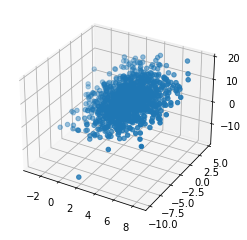

In [44]:
ax=plt.axes(projection='3d')
ax.scatter3D(x1[0:1000],x2[0:1000],Y[0:1000])